In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [72]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터분석

## skeleton

In [5]:
DATA_FILE = "/gdrive/MyDrive/Colab Notebooks/data.json"
DUMP_FILE = "/gdrive/MyDrive/Colab Notebooks/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                "|".join(categories),
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            user_age = 2021 - int(u["born_year"]) + 1

            reviews.append(
                [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
            )
            users.append(
                [u["id"], u["gender"], user_age]
            )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [62]:
df_users = df_users[raw_data["users"].age.between(0, 100)]
print(df_users.info())
print(df_users.age.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91357 entries, 16475 to 6536
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      91357 non-null  int64 
 1   gender  91357 non-null  object
 2   age     91357 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ MB
None
count    91357.000000
mean        35.513283
std          8.626258
min          4.000000
25%         30.000000
50%         33.000000
75%         40.000000
max         91.000000
Name: age, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [49]:
print(raw_data["users"].describe())

                  id           age
count   91398.000000  91398.000000
mean   324560.215782     36.069761
std    255908.402479     34.598989
min         7.000000    -17.000000
25%    127124.000000     30.000000
50%    255093.000000     33.000000
75%    469245.000000     40.000000
max    950331.000000   2022.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


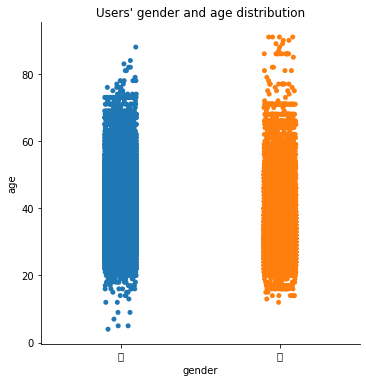

In [74]:
users = df_users[df_users.age < 200]
f_users = df_users[df_users.age > 0]
f_users.loc['']

chart = sns.catplot(x="gender", y="age", data=f_users)
plt.title("Users' gender and age distribution")
plt.show()


In [65]:
age_baby = df_users[df_users.age.between(0, 10)].groupby(["gender"]).gender.count()
age10s = df_users[df_users.age.between(11, 20)].groupby(["gender"]).gender.count()
age20s = df_users[df_users.age.between(21, 30)].groupby(["gender"]).gender.count()
age30s = df_users[df_users.age.between(31, 40)].groupby(["gender"]).gender.count()
age40s = df_users[df_users.age.between(41, 50)].groupby(["gender"]).gender.count()
age50s = df_users[df_users.age.between(51, 60)].groupby(["gender"]).gender.count()
age60s = df_users[df_users.age.between(61, 70)].groupby(["gender"]).gender.count()
age70s = df_users[df_users.age.between(71, 80)].groupby(["gender"]).gender.count()
age80s = df_users[df_users.age.between(81, 100)].groupby(["gender"]).gender.count()
age_range = pd.concat([age_baby, age10s, age20s, age30s, age40s, age50s, age60s, age70s, age80s], ignore_index=False, keys=["Under10", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"])
age_range = age_range.unstack(level = -1,  fill_value= 0)

In [85]:
print(age_range)
df_new = age_range.rename(columns={'남': 'M','여':'F'})
print(df_new)

gender       남      여
Under10      6      0
10s         67    126
20s       8384  20418
30s      19484  21547
40s      12065   3247
50s       4066    822
60s        541    325
70s        141     84
80s          7     27


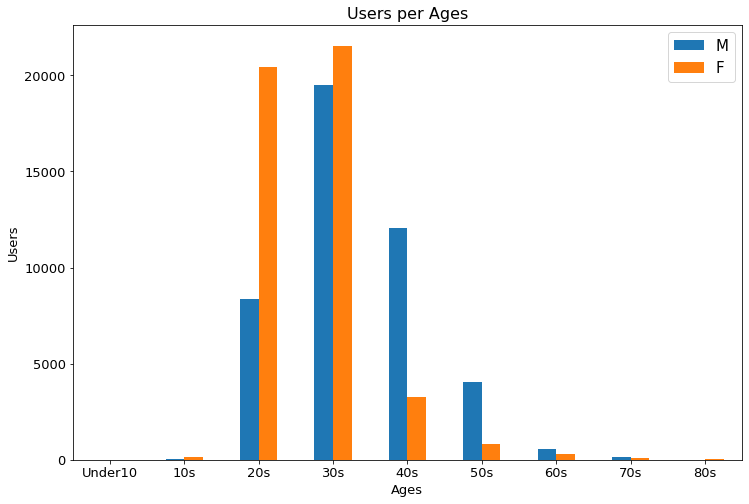

In [86]:
df_new.plot(kind = "bar", figsize = (12,8), rot=0, fontsize = 13)
plt.xlabel("Ages", fontsize = 13)
plt.ylabel("Users", fontsize = 13)
plt.title("Users per Ages", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

In [6]:
print(raw_data["stores"].head())
# print(data["reviews"].head())
# print(data["users"].head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


## 무슬림친화레스토랑

In [8]:
MUSLIM_PATH = '/gdrive/MyDrive/Colab Notebooks/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH.head())

        레스토랑명     무슬림친화도  지역  ...      휴일 주차                관광지
0       우스마니아  무슬림 자가 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
1   미스터케밥 2호점   할랄 공식 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
2       카파도키아  무슬림 자가 인증  부산  ...    연중무휴  O                범어사
3     올리브레스토랑  무슬림 자가 인증  인천  ...     NaN  O            송도센트럴파크
4  봄베이인도요리전문점   무슬림 프렌들리  경남  ...  매주 월요일  O          창원시립마산박물관

[5 rows x 10 columns]


## 기초통계

Store_name 최대 글자 길이

In [9]:
max(raw_data['stores'].store_name.map(lambda x: len(x)).max(), CSV_MUSLIM_PATH['레스토랑명'].map(lambda x: len(x)).max())

30

MUSLIM_FRIENDLY 최대 길이

In [10]:
CSV_MUSLIM_PATH["무슬림친화도"].map(lambda x: len(x)).max()

9

무슬림레스토랑 지역 종류 및 빈도수

In [11]:
CSV_MUSLIM_PATH['지역'].value_counts()

서울    135
경기     46
부산     30
강원     26
제주     23
대구     19
경북     12
전북     12
인천     11
경남     10
울산      9
충북      5
전남      4
광주      3
대전      1
충남      1
Name: 지역, dtype: int64

주소 최대 길이

In [12]:
# print(raw_data['stores']['address'].map(lambda x: len(x)).max())
print(CSV_MUSLIM_PATH['주소'].map(lambda x: len(x)).max())

46


## merge : skeleton + 무슬림레스토랑


In [13]:
store_table = raw_data["stores"].copy()
muslim_table = CSV_MUSLIM_PATH.copy()

In [14]:
# store_table['full_store_name'] = store_table[['store_name', 'branch']].apply(' '.join, axis=1)
# store_table['full_store_name'] = store_table["store_name"] + " " + store_table["branch"]

In [15]:
print(store_table.head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [16]:
store_table.drop_duplicates()

,id,store_name,branch,area,tel,address,latitude,longitude,category
0,1,Agal,None,홍대,010-6689-5886,서울특별시 마포구 동교동 170-13,37.556862,126.926666,아구찜|포장마차
1,2,Assisy,None,광주,062-367-0700,광주광역시 서구 농성동 631-33,35.150746,126.890062,카페
2,3,Battered Sole,None,이태원,02-749-6867,서울특별시 용산구 이태원동 118-9,37.535032,126.991664,피쉬앤칩스|펍
3,4,Chakyoung,None,달맞이길,051-756-5566,부산광역시 해운대구 중2동 1509-5,35.158587,129.175004,레스토랑|카프레제
4,5,Delabobo,None,발산역,02-2667-9854,서울특별시 강서구 등촌동 689,37.559904,126.840512,디저트카페|디저트
...,...,...,...,...,...,...,...,...,...
459983,459996,행복부대찌개,None,녹양동,031-877-2410,경기도 의정부시 녹양동 154-6,37.757939,127.032758,
459984,459997,행복부페,None,안중읍,031-682-1733,경기도 평택시 안중읍 용성리 718-3,37.002743,126.944991,
459985,459998,행복분식,None,퇴촌면,031-8071-2668,경기도 광주 퇴촌면 도수리 611-6,37.471677,127.315744,
459986,459999,행복분식,None,소주동,055-312-3713,경상남도 양산시 소주동 147-1,35.407860,129.158564,


In [17]:
store_table.columns

Index(['id', 'store_name', 'branch', 'area', 'tel', 'address', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [18]:
muslim_table.columns = ['store_name', 'muslim_friendly', 'location_region', 'food_category', 'address', 'tel', 'working_time', 'days_closed','parking','tourism']
muslim_table.head()

,store_name,muslim_friendly,location_region,food_category,address,tel,working_time,days_closed,parking,tourism
0,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
1,미스터케밥 2호점,할랄 공식 인증,서울,터키음식,서울 용산구 우사단로 42,070-7532-1997,08:00-05:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
2,카파도키아,무슬림 자가 인증,부산,터키음식,부산 금정구 금단로 123-9,051-515-5981,11:30-22:00,연중무휴,O,범어사
3,올리브레스토랑,무슬림 자가 인증,인천,아랍음식,인천 연수구 옥련로 31,032-874-2800,10.30-22:00,NaN,O,송도센트럴파크
4,봄베이인도요리전문점,무슬림 프렌들리,경남,인도음식,경남 창원시 성산구 용지로 74,055-263-4111,"11:30-22:00(브레이크 타임 15:00-17:00, 주말에는 브레이크 타임 없음)",매주 월요일,O,창원시립마산박물관


### 가게 이름으로 묶기


In [19]:
df_merge = pd.merge(muslim_table, store_table, on='store_name', how='left')
print(df_merge)

     store_name muslim_friendly  ...   longitude  category
0         우스마니아       무슬림 자가 인증  ...  126.995705        인도
1     미스터케밥 2호점        할랄 공식 인증  ...         NaN       NaN
2         카파도키아       무슬림 자가 인증  ...  129.092210    터키|이슬람
3       올리브레스토랑       무슬림 자가 인증  ...  128.872874          
4    봄베이인도요리전문점        무슬림 프렌들리  ...         NaN       NaN
..          ...             ...  ...         ...       ...
972       카사블랑카        무슬림 프렌들리  ...  126.987046  모로코|샌드위치
973       카사블랑카        무슬림 프렌들리  ...  128.612449          
974       카사블랑카        무슬림 프렌들리  ...  128.423302          
975       카사블랑카        무슬림 프렌들리  ...  127.029000  모로코|샌드위치
976      카페 다스티        할랄 공식 인증  ...         NaN       NaN

[977 rows x 18 columns]


In [20]:
df_merge.drop_duplicates("store_name", inplace=True)
print(df_merge.shape)

(345, 18)


In [21]:
print(muslim_table.shape)

(347, 10)


#### 가게이름으로 기초통계

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       345 non-null    object 
 1   muslim_friendly  345 non-null    object 
 2   location_region  345 non-null    object 
 3   food_category    288 non-null    object 
 4   address_x        345 non-null    object 
 5   tel_x            345 non-null    object 
 6   working_time     345 non-null    object 
 7   days_closed      222 non-null    object 
 8   parking          345 non-null    object 
 9   tourism          345 non-null    object 
 10  id               141 non-null    float64
 11  branch           11 non-null     object 
 12  area             139 non-null    object 
 13  tel_y            140 non-null    object 
 14  address_y        141 non-null    object 
 15  latitude         141 non-null    object 
 16  longitude        141 non-null    object 
 17  category        

주소 교집합

In [38]:
df_merge.columns

Index(['store_name', 'muslim_friendly', 'location_region', 'food_category',
       'address_x', 'tel_x', 'working_time', 'days_closed', 'parking',
       'tourism', 'id', 'branch', 'area', 'tel_y', 'address_y', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [39]:
df_merge[df_merge['address_x'] == df_merge['address_y']]

,store_name,muslim_friendly,location_region,food_category,address_x,tel_x,working_time,days_closed,parking,tourism,id,branch,area,tel_y,address_y,latitude,longitude,category


In [40]:
df_merge[df_merge['tel_x'] == df_merge['tel_y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 962
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       74 non-null     object 
 1   muslim_friendly  74 non-null     object 
 2   location_region  74 non-null     object 
 3   food_category    63 non-null     object 
 4   address_x        74 non-null     object 
 5   tel_x            74 non-null     object 
 6   working_time     74 non-null     object 
 7   days_closed      48 non-null     object 
 8   parking          74 non-null     object 
 9   tourism          74 non-null     object 
 10  id               74 non-null     float64
 11  branch           4 non-null      object 
 12  area             72 non-null     object 
 13  tel_y            74 non-null     object 
 14  address_y        74 non-null     object 
 15  latitude         74 non-null     object 
 16  longitude        74 non-null     object 
 17  category         

### 전화번호로 묶기

In [32]:
df_tel= pd.merge(muslim_table, store_table, on='tel')
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   store_name_x     244 non-null    object
 1   muslim_friendly  244 non-null    object
 2   location_region  244 non-null    object
 3   food_category    200 non-null    object
 4   address_x        244 non-null    object
 5   tel              244 non-null    object
 6   working_time     244 non-null    object
 7   days_closed      162 non-null    object
 8   parking          244 non-null    object
 9   tourism          244 non-null    object
 10  id               244 non-null    int64 
 11  store_name_y     244 non-null    object
 12  branch           32 non-null     object
 13  area             240 non-null    object
 14  address_y        244 non-null    object
 15  latitude         244 non-null    object
 16  longitude        244 non-null    object
 17  category         244 non-null    ob

In [41]:
# null 값 일 수도  있음
df_tel.drop_duplicates("tel").shape

(234, 18)

## merge : review + user

In [29]:
user_table = raw_data["users"].copy()
user_table.columns

Index(['id', 'gender', 'age'], dtype='object')

In [30]:
review_table = raw_data["reviews"].copy()
review_table.columns

Index(['id', 'store', 'user', 'score', 'content', 'reg_time'], dtype='object')

In [42]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

## merge: merged + reivew_merged

In [44]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

In [45]:
df_merged = pd.merge(df_merge, df_review_user, left_on='id', right_on='store')
df_merged.shape

(113, 27)

In [46]:
df_tel_merged = pd.merge(df_tel, df_review_user, left_on='id', right_on='store')
df_tel_merged.shape

(179, 27)

In [63]:
df_tel_merged.describe

<bound method NDFrame.describe of     store_name_x muslim_friendly location_region  ...    id_y gender age
0          우스마니아       무슬림 자가 인증              서울  ...   90292      여  26
1          우스마니아       무슬림 자가 인증              서울  ...  225842      여  23
2      미스터케밥 2호점        할랄 공식 인증              서울  ...  109581      여  34
3         케르반 카페       무슬림 자가 인증              서울  ...  109581      여  34
4     라마앤바바나 서면점        무슬림 프렌들리              부산  ...  728391      남  39
..           ...             ...             ...  ...     ...    ...  ..
174         전주식당        무슬림 프렌들리              서울  ...  171967      여  34
175         전주식당        무슬림 프렌들리              서울  ...    5142      여  25
176      사마르칸트시티        무슬림 프렌들리              서울  ...  155100      남  36
177       뿌자레스토랑        무슬림 프렌들리              서울  ...  159353      여  27
178    봄베이브로이 울산        무슬림 프렌들리              울산  ...   58205      여  42

[179 rows x 27 columns]>